## Practica 5
#### Forward propagation y representacion intermedia

Creacion de Fordward propagation de las graficas

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [87]:
class ForwardProg:
    def __init__(self, w1, w2):    
        self.wl1 = w1
        self.wl2 = w2
        self.hidden = None

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def ite_propagation(self,x, add_sesgo= False):
        print(x.shape)
        print(self.wl1.shape)
        hidden = self.sigmoid(np.matmul(x,self.wl1.T))
        self.hidden = hidden
        #print(hidden.shape)
        if add_sesgo:
            largo = hidden.shape[0]
            sesgo = np.ones(largo).reshape(largo,1)
            #print(sesgo.shape)
            #print(hidden.shape)
            hidden = np.hstack((hidden,sesgo))
            #print(hidden.shape)
        print(hidden.shape)
        print(self.wl2.shape)
        sal = self.sigmoid(np.matmul(hidden,self.wl2.T))
        #print(sal.shape)
        return sal
    
    def get_hidden(self):
        return self.hidden

<img src="diagrama1.PNG"/>

In [164]:
x1 = np.array([
 [5, 10, 1],
 [1, 1, 1],
 [0, 1, 1],    
 [10, 5, 1],
])

w11 = np.array([
    [5, -2, -8],
    [7, -3, 1]
])

w12 = np.array([[7, 5, -6]])

red1  = ForwardProg(w11,w12)
y_1 = red1.ite_propagation(x1,True)
y_1

(4, 3)
(2, 3)
(4, 3)
(1, 3)


array([[0.33617605],
       [0.27158134],
       [0.00447989],
       [0.99752738]])

In [166]:
color1 = (y_1>0.5).astype(int)

<img src="diagrama2.PNG"/>

In [190]:
x2 = np.array([
 [1, 1],
 [0, 0],
 [0, 1],    
 [1, 0],
 [-12, 0],    
 [-3, -19],
])

w21 = np.array([
    [8, 0.2],
    [0.4, 0.9],
    [0.3, 0.5]
])

w22 = np.array([[0.3, 0.5, 0.9]])

red2  = ForwardProg(w21,w22)
y_2 = red2.ite_propagation(x2)
y_2

(6, 2)
(3, 2)
(6, 3)
(1, 3)


array([[0.78815037],
       [0.70056714],
       [0.74661477],
       [0.75329089],
       [0.50700419],
       [0.50000685]])

In [191]:
color2 = (y_2>0.6).astype(int)

<img src="diagrama3.PNG"/>

In [170]:
x3 = np.array([
 [1, 1, 1],
 [0, 0, 1],
 [0, 1, 1],    
 [1, 0, 1],
])

w31 = np.array([
    [20, 20, -10],
    [-20, -20, 30]
])

w32 = np.array([[20, 20, -30]])

red3  = ForwardProg(w31,w32)
y_3 = red3.ite_propagation(x3,True)
y_3

(4, 3)
(2, 3)
(4, 3)
(1, 3)


array([[4.54391049e-05],
       [4.54391049e-05],
       [9.99954520e-01],
       [9.99954520e-01]])

In [171]:
color3 = (y_3>0.5).astype(int)
color3.T[0]

array([0, 0, 1, 1])

### Representacion de datos intermedios

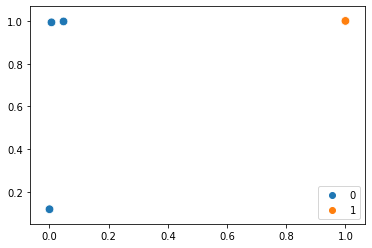

In [172]:
# Grafico 1
ax = sb.scatterplot(x=red1.hidden[:,0], y=red1.hidden[:,1],s=75, hue=color1.T[0])

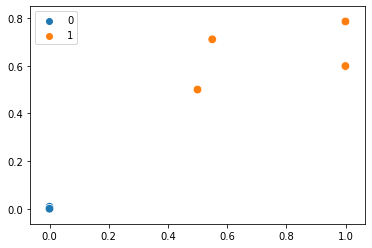

In [194]:
# Grafico 2
ax = sb.scatterplot(x=red2.hidden[:,0], y=red2.hidden[:,1],s=75, hue=color2.T[0])

Grafico 3, asociado a la funcion de xor

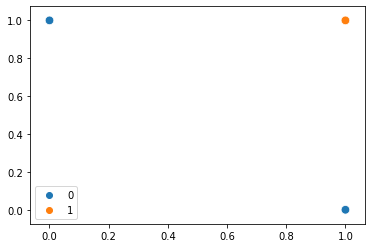

In [196]:
# Grafico 3
ax = sb.scatterplot(x=red3.hidden[:,0], y=red3.hidden[:,1],s=75, hue=color3.T[0])

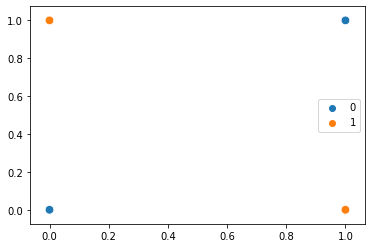

In [163]:
#### Datos originales
ax_o = sb.scatterplot(x=x3[:,0], y=x3[:,1],s=75, hue=color3.T[0])


### Conclusiones

El analisis de la ultima grafica en cuanto a sus datos intermedios es que ahora es posible separarlos linealmente.  La trasformacion que sufren los datos durante el proceso los proyecta a un plano distinto al inicial, debido a la cantidad de datos y neuronas es facilmente representable comparado con su ingreso.

Debido a que todas las neuronas pasan por su funcion de activacion (sigmoid en este caso), todas estan en un rango de 0 a 1 y es posible separarlas por valores de este rango sin importar la entrada o cantidad de datos.